In [1]:
# PRELIMINARIES

In [2]:
'''

link: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/home

This dataset consists of a nearly 3000 Amazon customer reviews 
(input text), star ratings, date of review, variant and feedback
of various amazon Alexa products like Alexa Echo, Echo dots, 
Alexa Firesticks etc. for learning how to train Machine for 
sentiment analysis.

You can use this data to analyze Amazon’s Alexa product;
discover insights into consumer reviews and assist with machine learning
models.You can also train your machine models for sentiment analysis and
analyze customer reviews how many positive reviews ? 
and how many negative reviews ?

Extracted from Amazon's website
'''

"\n\nlink: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/home\n\nThis dataset consists of a nearly 3000 Amazon customer reviews \n(input text), star ratings, date of review, variant and feedback\nof various amazon Alexa products like Alexa Echo, Echo dots, \nAlexa Firesticks etc. for learning how to train Machine for \nsentiment analysis.\n\nYou can use this data to analyze Amazon’s Alexa product;\ndiscover insights into consumer reviews and assist with machine learning\nmodels.You can also train your machine models for sentiment analysis and\nanalyze customer reviews how many positive reviews ? \nand how many negative reviews ?\n\nExtracted from Amazon's website\n"

In [3]:
import pandas as pd, numpy as np
PATH = "/kaggle/input/combinedataset-all-device/combined_smart_devices_sentiment.csv"
raw_data = pd.read_csv(PATH)

In [4]:
pd.set_option('display.max_colwidth', -1)
raw_data.head()

,ratings,date,verified_reviews,Product Name,Sentiment,variation
0,3,"Reviewed in the United States on August 8, 2024","the product itself is neat and compact, but the effectiveness varies. Ive had a google nest previously, but this one is less effective. It has started playing music without being told. Also, it doesn't always set a timer when I tell it to. I have mixed feelings on the product. Make sure it is not near a TV or high volume areas, otherwise it might have trouble interpreting.",Google Pod,0,NaN
1,5,"Reviewed in the United States on October 25, 2024","I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",Google Pod,1,NaN
2,4,"Reviewed in the United States on December 10, 2023","The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",Google Pod,1,NaN
3,3,"Reviewed in the United States on May 21, 2024","I ended up getting my speaker to work, but when I first opened the box, all the descriptions on the outside were in Japanese or Chinese. When I plugged it in, the voice also spoke a foreign language, but I somehow got it to English. As I've been using it, the speaker kind of pops like a firework the slightest bit, but it still works, and I haven't had any other issues.",Google Pod,0,NaN
4,3,"Reviewed in the United States on January 25, 2024","Received this Nest Mini quickly. The box was all in Japanese, which was odd. I feel like they shouldn't be selling overseas products without notating that on the sales listing.When the Nest initiated, it spoke only in Japanese. Thankfully, when I connected it to the Google Home app, it switched to English and seems fine now. However, I already had another Google Nest in place and the Home app was already configured, so it was easy for me. I also knew beforehand how it works, so I didn't really need the voice prompts.It might not be so easy for someone who hasn't used one before.",Google Pod,0,NaN


In [5]:
# Mapping ratings to sentiment classes
# 5, 4 -> Positive (1), 1, 2 -> Negative (0), 3 -> Neutral (2)
raw_data['sentiment'] = raw_data['ratings'].map(lambda x: 1 if x in [5, 4] else 0)

# Verifying the updated dataset
raw_data.head()

,ratings,date,verified_reviews,Product Name,Sentiment,variation,sentiment
0,3,"Reviewed in the United States on August 8, 2024","the product itself is neat and compact, but the effectiveness varies. Ive had a google nest previously, but this one is less effective. It has started playing music without being told. Also, it doesn't always set a timer when I tell it to. I have mixed feelings on the product. Make sure it is not near a TV or high volume areas, otherwise it might have trouble interpreting.",Google Pod,0,NaN,0
1,5,"Reviewed in the United States on October 25, 2024","I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",Google Pod,1,NaN,1
2,4,"Reviewed in the United States on December 10, 2023","The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",Google Pod,1,NaN,1
3,3,"Reviewed in the United States on May 21, 2024","I ended up getting my speaker to work, but when I first opened the box, all the descriptions on the outside were in Japanese or Chinese. When I plugged it in, the voice also spoke a foreign language, but I somehow got it to English. As I've been using it, the speaker kind of pops like a firework the slightest bit, but it still works, and I haven't had any other issues.",Google Pod,0,NaN,0
4,3,"Reviewed in the United States on January 25, 2024","Received this Nest Mini quickly. The box was all in Japanese, which was odd. I feel like they shouldn't be selling overseas products without notating that on the sales listing.When the Nest initiated, it spoke only in Japanese. Thankfully, when I connected it to the Google Home app, it switched to English and seems fine now. However, I already had another Google Nest in place and the Home app was already configured, so it was easy for me. I also knew beforehand how it works, so I didn't really need the voice prompts.It might not be so easy for someone who hasn't used one before.",Google Pod,0,NaN,0


In [6]:
raw_data


,ratings,date,verified_reviews,Product Name,Sentiment,variation,sentiment
0,3,"Reviewed in the United States on August 8, 2024","the product itself is neat and compact, but the effectiveness varies. Ive had a google nest previously, but this one is less effective. It has started playing music without being told. Also, it doesn't always set a timer when I tell it to. I have mixed feelings on the product. Make sure it is not near a TV or high volume areas, otherwise it might have trouble interpreting.",Google Pod,0,NaN,0
1,5,"Reviewed in the United States on October 25, 2024","I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",Google Pod,1,NaN,1
2,4,"Reviewed in the United States on December 10, 2023","The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",Google Pod,1,NaN,1
3,3,"Reviewed in the United States on May 21, 2024","I ended up getting my speaker to work, but when I first opened the box, all the descriptions on the outside were in Japanese or Chinese. When I plugged it in, the voice also spoke a foreign language, but I somehow got it to English. As I've been using it, the speaker kind of pops like a firework the slightest bit, but it still works, and I haven't had any other issues.",Google Pod,0,NaN,0
4,3,"Reviewed in the United States on January 25, 2024","Received this Nest Mini quickly. The box was all in Japanese, which was odd. I feel like they shouldn't be selling overseas products without notating that on the sales listing.When the Nest initiated, it spoke only in Japanese. Thankfully, when I connected it to the Google Home app, it switched to English and seems fine now. However, I already had another Google Nest in place and the Home app was already configured, so it was easy for me. I also knew beforehand how it works, so I didn't really need the voice prompts.It might not be so easy for someone who hasn't used one before.",Google Pod,0,NaN,0
5,3,"Reviewed in the United States on February 4, 2024","Seller claims ships with default set to English but all language compatible. Did not show up with any English on the box, nor did it speak English during my setup. Took an hour to set up with me having to Google instructions and factory reset the device several times as it would stop trying to pair during the activation process and I had no clue what it was telling me. Functions in English and works normal after finally connected to my Home, but should not have been this difficult and is NOT as described by the seller.",Google Pod,0,NaN,0
6,4,"Reviewed in the United States on November 13, 2023","It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",Google Pod,1,NaN,1
7,5,"Reviewed in the United States on January 3, 2024","Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",Google Pod,1,NaN,1
8,5,"Reviewed in the United State

In [7]:
raw_data.ratings.value_counts()

5    962
1    871
4    481
2    481
3    444
Name: ratings, dtype: int64

In [8]:
# Remove Rating = 3 categories as they are likely to confuse the model. 
raw_data['response'] = 0
raw_data.loc[raw_data['ratings'].isin([4,5]), 'response'] = 1
raw_data.loc[raw_data['ratings'] == 3, 'response'] = 2
bad_reviews = raw_data[raw_data['response'] == 0]
good_reviews = raw_data[raw_data['response'] == 1]
all_reviews = good_reviews.append(bad_reviews)

In [9]:
data = all_reviews[['response', 'verified_reviews']]
data.columns = ['response', 'text']

In [10]:
# EXPLORATORY DATA ANALYSIS

In [11]:
pd.set_option('display.max_colwidth', -1)
data.head()

,response,text
1,1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track."
2,1,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back."
6,1,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall."
7,1,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large."
8,1,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item."


In [12]:
data.shape

(2795, 2)

In [13]:
# Event Rate
data.response.value_counts()

1    1443
0    1352
Name: response, dtype: int64

In [14]:
# Check for Nulls
data.isnull().sum()

response    0
text        0
dtype: int64

In [15]:
# Check Data Types
data['text'].astype('str')
data.dtypes

response    int64 
text        object
dtype: object

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# SYNTACTICAL FEATURES (PHYSICAL DESCRIPTIONS)

In [18]:
# 1. Size Measurements

# no. of characters (also text size)
data['char_cnt'] = data['text'].str.len()

# no. of words
data['word_cnt'] = data['text'].apply(lambda x: len(str(x).split()))

# no. of sentences
data['sentence_cnt'] = data['text'].apply(lambda x: len(str(x).split(". ")))

data[['text', 'char_cnt', 'word_cnt', 'sentence_cnt']].head()

,text,char_cnt,word_cnt,sentence_cnt
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",119,23,2
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",511,97,8
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",241,48,2
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",550,104,4
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",110,17,2


In [19]:
# 2. Derived Ratios

# avg. word size
data['avg_word_size'] = data['char_cnt']/data['word_cnt']

# avg. sentence size
data['avg_char_per_sent'] = data['char_cnt']/data['sentence_cnt']

# avg. words per sentence
data['avg_word_per_sent'] = data['word_cnt']/data['sentence_cnt']

data[['text','avg_word_size','avg_char_per_sent', 'avg_word_per_sent']].head()

,text,avg_word_size,avg_char_per_sent,avg_word_per_sent
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",5.173913,59.500,11.500
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",5.268041,63.875,12.125
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",5.020833,120.500,24.000
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",5.288462,137.500,26.000
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",6.470588,55.000,8.500


In [20]:
# 3. Stopwords/filler Words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# no. of stopwords
data['stop_cnt'] = data['text'].apply(lambda x: len([x for x in x.split() if x in stop]))

# no. of stopwords in every sentence
data['avg_stop_per_sent'] = data['stop_cnt']/data['sentence_cnt']

# no. of stopwords to total words
data['avg_stop_per_word'] = data['stop_cnt']/data['word_cnt']

data[['text','stop_cnt', 'avg_stop_per_sent', 'avg_stop_per_word']].head()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


,text,stop_cnt,avg_stop_per_sent,avg_stop_per_word
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",10,5.00,0.434783
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",44,5.50,0.453608
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",22,11.00,0.458333
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",47,11.75,0.451923
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",6,3.00,0.352941


In [21]:
# 4. Counts of Key Characters/Words

# no. of hashtags
data['hash_cnt'] = data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

# no. of @tags
data['tag_cnt'] = data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))

# no. of exclamations!
data['excl_cnt'] = data['text'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))

# no. of questions? 
data['ques_cnt'] = data['text'].apply(lambda x: len([x for x in x.split() if x.endswith('?')]))

# no. of numeric chars
data['num_cnt'] = data['text'].apply(lambda x: sum(i.isdigit() for i in x))

# no. of uppercase words (SHOUTING?)
data['upper_cnt'] = data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

data[['text','hash_cnt', 'tag_cnt', 'excl_cnt','ques_cnt', 'num_cnt', 'upper_cnt']].head()

,text,hash_cnt,tag_cnt,excl_cnt,ques_cnt,num_cnt,upper_cnt
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",0,0,0,0,0,1
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",0,0,0,0,0,5
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",0,0,0,0,1,1
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",0,0,0,0,1,1
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",0,0,0,0,0,0


In [22]:
# 5. Counts of Parts of Speech (POS Counts)

# tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
data['word_tokens'] = data['text'].apply(word_tokenize)

# number of nouns
data['noun_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("NN", "NNS", "NNP", "NNPS")]))
data['proper_noun_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("NNP", "NNPS")]))

# number of pronouns
data['pronoun_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("PRP", "PRP$")]))
data['wh_pronoun_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("WP", "WP$")]))
data['pronoun_tot_cnt'] = data['pronoun_cnt'] + data['wh_pronoun_cnt']

# number of adjectives
data['adj_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("JJ","JJR", "JJS")]))

# number of verbs
data['verb_past_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("VBP", "VBZ","VBG")]))
data['verb_present_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("VBD", "VBN")]))
data['verb_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("VB")]))
data['verb_tot_cnt'] =  data['verb_past_cnt'] + data['verb_present_cnt'] + data['verb_cnt']

# number of adverbs
data['adverb_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("RB", "RBR", "RBS")]))

# number of modals
data['modal_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("MD")]))

# number of foreign words
data['foreign_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("FW")]))

# number of determiners
data['det_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("DET")]))

# number of conjunctions
data['cc_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("CC")]))
data['in_cnt'] = data['word_tokens'].apply(lambda x: len([i for i in pos_tag(x) if i[1] in ("IN")]))
data['ccin_cnt'] = data['cc_cnt'] + data['in_cnt']

data[['text','noun_cnt', 'proper_noun_cnt', 
                'pronoun_cnt','wh_pronoun_cnt','pronoun_tot_cnt',
                'adj_cnt', 'adverb_cnt','foreign_cnt','det_cnt', 'modal_cnt',
                'verb_cnt', 'verb_past_cnt', 'verb_present_cnt','verb_tot_cnt'
                ,'cc_cnt', 'in_cnt', 'ccin_cnt']].head()

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


,text,noun_cnt,proper_noun_cnt,pronoun_cnt,wh_pronoun_cnt,pronoun_tot_cnt,adj_cnt,adverb_cnt,foreign_cnt,det_cnt,modal_cnt,verb_cnt,verb_past_cnt,verb_present_cnt,verb_tot_cnt,cc_cnt,in_cnt,ccin_cnt
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",6,1,7,0,7,1,1,0,0,0,1,2,0,3,1,2,3
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",17,2,11,0,11,11,9,0,0,2,5,13,8,26,2,7,9
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",10,0,4,0,4,3,1,0,0,1,5,3,1,9,1,7,8
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",19,0,16,0,16,17,9,0,0,0,4,10,3,17,3,12,15
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",6,2,1,0,1,1,1,0,0,0,0,1,2,3,0,2,2


In [23]:
# Prepare the Data

features = ['response','char_cnt', 'word_cnt', 'sentence_cnt', 'avg_word_size','avg_char_per_sent',
                  'avg_word_per_sent', 'stop_cnt', 'avg_stop_per_sent', 'avg_stop_per_word',
                  'hash_cnt', 'tag_cnt', 'excl_cnt','ques_cnt', 'num_cnt', 'upper_cnt',
           'noun_cnt', 'proper_noun_cnt', 
                'pronoun_cnt','wh_pronoun_cnt','pronoun_tot_cnt',
                'adj_cnt', 'adverb_cnt','foreign_cnt','det_cnt', 'modal_cnt',
                'verb_cnt', 'verb_past_cnt', 'verb_present_cnt','verb_tot_cnt'
                ,'cc_cnt', 'in_cnt', 'ccin_cnt']
data_temp = data[features]
data_temp = data_temp.dropna()
data_temp.head()

,response,char_cnt,word_cnt,sentence_cnt,avg_word_size,avg_char_per_sent,avg_word_per_sent,stop_cnt,avg_stop_per_sent,avg_stop_per_word,hash_cnt,tag_cnt,excl_cnt,ques_cnt,num_cnt,upper_cnt,noun_cnt,proper_noun_cnt,pronoun_cnt,wh_pronoun_cnt,pronoun_tot_cnt,adj_cnt,adverb_cnt,foreign_cnt,det_cnt,modal_cnt,verb_cnt,verb_past_cnt,verb_present_cnt,verb_tot_cnt,cc_cnt,in_cnt,ccin_cnt
1,1,119,23,2,5.173913,59.500,11.500,10,5.00,0.434783,0,0,0,0,0,1,6,1,7,0,7,1,1,0,0,0,1,2,0,3,1,2,3
2,1,511,97,8,5.268041,63.875,12.125,44,5.50,0.453608,0,0,0,0,0,5,17,2,11,0,11,11,9,0,0,2,5,13,8,26,2,7,9
6,1,241,48,2,5.020833,120.500,24.000,22,11.00,0.458333,0,0,0,0,1,1,10,0,4,0,4,3,1,0,0,1,5,3,1,9,1,7,8
7,1,550,104,4,5.288462,137.500,26.000,47,11.75,0.451923,0,0,0,0,1,1,19,0,16,0,16,17,9,0,0,0,4,10,3,17,3,12,15
8,1,110,17,2,6.470588,55.000,8.500,6,3.00,0.352941,0,0,0,0,0,0,6,2,1,0,1,1,1,0,0,0,0,1,2,3,0,2,2


In [24]:
data_temp.shape

(2795, 33)

In [25]:
!pip install catboost

In [26]:
# PRE PROCESSING FOR ADVANCED FEATURES

In [27]:
# lowercase all
data['text_clean_v1'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data[['text', 'text_clean_v1']].head()

,text,text_clean_v1
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.","i love my google speaker, especially when it remind me of my daily task the weather and calendar. it keeps me on track."
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.","the speaker does not come speaking english. i read many other reviews saying theirs had came in spanish which would have been fine, but that was also not the case for me, mine was french. luckily i have other speakers so set up wasn't to difficult. i love these speakers they make some things easier. mine does make a weird sound as if you were trying to change the radio station on a satellite radio. not sure if anyone else's is doing that or not. makes me nervous. if it continues i will be sending it back."
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.","it works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. i had to use a separate extension cable to be able to push the piece of furniture back against the wall."
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.","always wanted my house to be more techy and honestly this was a good first step for me. i have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. my favorite command is “okay google, good morning”. it gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!listens to my voice even if i’m talking on a moderately low volume.the only thing i hate about it is that it took up the entire 2 sockets because its rather large."
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.","despite getting the japanese language version for some reason, once paired it switched to english. great item."


In [28]:
# remove punctuation
data['text_clean_v2'] = data['text_clean_v1'].str.replace('[^\w\s]','')
data[['text', 'text_clean_v1', 'text_clean_v2']].head()

,text,text_clean_v1,text_clean_v2
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.","i love my google speaker, especially when it remind me of my daily task the weather and calendar. it keeps me on track.",i love my google speaker especially when it remind me of my daily task the weather and calendar it keeps me on track
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.","the speaker does not come speaking english. i read many other reviews saying theirs had came in spanish which would have been fine, but that was also not the case for me, mine was french. luckily i have other speakers so set up wasn't to difficult. i love these speakers they make some things easier. mine does make a weird sound as if you were trying to change the radio station on a satellite radio. not sure if anyone else's is doing that or not. makes me nervous. if it continues i will be sending it back.",the speaker does not come speaking english i read many other reviews saying theirs had came in spanish which would have been fine but that was also not the case for me mine was french luckily i have other speakers so set up wasnt to difficult i love these speakers they make some things easier mine does make a weird sound as if you were trying to change the radio station on a satellite radio not sure if anyone elses is doing that or not makes me nervous if it continues i will be sending it back
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.","it works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. i had to use a separate extension cable to be able to push the piece of furniture back against the wall.",it works fine but if you want to put this cord behind some furniture like me the plug will be sticking about 4 inches off the wall i had to use a separate extension cable to be able to push the piece of furniture back against the wall
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.","always wanted my house to be more techy and honestly this was a good first step for me. i have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. my favorite command is “okay google, good morning”. it gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!listens to my voice even if i’m talking on a moderately low volume.the only thing i hate about it is that it took up the entire 2 sockets because its rather large.",always wanted my house to be more techy and honestly this was a good first step for me i have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morningnight my favorite command

In [29]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text_clean_v3'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data[['text','text_clean_v3']].head()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


,text,text_clean_v3
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.","I love Google speaker, especially remind daily task weather calendar. It keeps track."
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.","The speaker NOT come speaking English. I read many reviews saying came Spanish would fine, also case me, mine French. Luckily I speakers set difficult. I love speakers make things easier. Mine make weird sound trying change radio station satellite radio. Not sure anyone else's not. Makes nervous. If continues I sending back."
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.","It works fine, want put cord behind furniture (like me), plug sticking 4 inches wall. I use separate extension cable able push piece furniture back wall."
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.","Always wanted house techy honestly good first step me. I many lights around house easy control voice rather switching one one every morning/night. My favorite command “okay google, good morning”. It gives run calendar, weather, important news, plays spotify help get ready!Listens voice even I’m talking moderately low volume.The thing hate took entire 2 sockets rather large."
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.","Despite getting Japanese language version reason, paired switched English. Great item."


In [30]:
'''
# correct spelling (takes time)
from textblob import TextBlob
data['text_clean_v4'] = data['text_clean_v3'].apply(lambda x: str(TextBlob(x).correct()))
data[['text_clean_v3', 'text_clean_v4']].head()
'''

"\n# correct spelling (takes time)\nfrom textblob import TextBlob\ndata['text_clean_v4'] = data['text_clean_v3'].apply(lambda x: str(TextBlob(x).correct()))\ndata[['text_clean_v3', 'text_clean_v4']].head()\n"

In [31]:
# remove rare words
rare_words = pd.Series(' '.join(data['text_clean_v3']).split()).value_counts()[-2500:]
rare_words.head() 
rare_words_list = list(rare_words.index)
data['text_clean_v5'] = data['text_clean_v3'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words_list))

In [32]:
# stemming
#import nltk
nltk.download('stem')
from nltk.stem import PorterStemmer
from textblob import Word
data['text_clean_v6'] = data['text_clean_v5'].apply(lambda x: " ".join([PorterStemmer().stem(word) for word in x.split()]))
data[['text', 'text_clean_v6']].head()

[nltk_data] Error loading stem: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


,text,text_clean_v6
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.","I love googl speaker, especi remind daili task weather calendar. It keep track."
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.","the speaker not come speak english. I read mani review say came spanish would fine, also case me, mine luckili I speaker set difficult. I love speaker make thing easier. mine make weird sound tri chang radio station satellit radio. not sure anyon else' not. make nervous. If continu I send back."
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.","It work fine, want put cord behind furnitur (like me), plug stick 4 inch wall. I use separ extens cabl abl push piec furnitur back wall."
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.","alway want hous techi honestli good first step me. I mani light around hous easi control voic rather switch one one everi morning/night. My favorit command “okay google, good morning”. It give run calendar, weather, import news, play spotifi help get voic even i’m talk moder low volume.th thing hate took entir 2 socket rather large."
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.","despit get japanes languag version reason, pair switch english. great item."


In [33]:
# lemmatization
import nltk
nltk.download('wordnet')
from textblob import Word
data['text_clean_v6'] = data['text_clean_v3'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data[['text', 'text_clean_v6']].head()

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


,text,text_clean_v6
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.","I love Google speaker, especially remind daily task weather calendar. It keep track."
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.","The speaker NOT come speaking English. I read many review saying came Spanish would fine, also case me, mine French. Luckily I speaker set difficult. I love speaker make thing easier. Mine make weird sound trying change radio station satellite radio. Not sure anyone else's not. Makes nervous. If continues I sending back."
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.","It work fine, want put cord behind furniture (like me), plug sticking 4 inch wall. I use separate extension cable able push piece furniture back wall."
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.","Always wanted house techy honestly good first step me. I many light around house easy control voice rather switching one one every morning/night. My favorite command “okay google, good morning”. It give run calendar, weather, important news, play spotify help get ready!Listens voice even I’m talking moderately low volume.The thing hate took entire 2 socket rather large."
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.","Despite getting Japanese language version reason, paired switched English. Great item."


In [34]:
# to check the effects of text processing just undo it and proceed, then compare result
# TLDR: it doesn't help much!
data['text_clean_v6'] = data['text']

In [35]:
# ADVANCED FEATURE ENGINEERING

In [36]:
# Physical Features

# no. of characters (also text size)
data['char_cnt'] = data['text_clean_v6'].str.len()

# no. of words
data['word_cnt'] = data['text_clean_v6'].apply(lambda x: len(str(x).split()))

# no. of sentences
data['sentence_cnt'] = data['text_clean_v6'].apply(lambda x: len(str(x).split(". ")))

# avg. word size
data['avg_word_size'] = data['char_cnt']/data['word_cnt']

# avg. sentence size
data['avg_char_per_sent'] = data['char_cnt']/data['sentence_cnt']

# avg. words per sentence
data['avg_word_per_sent'] = data['word_cnt']/data['sentence_cnt']

In [37]:
# TERM FREQUENCY/WORD COUNTS

In [38]:
# find common words
common_words = pd.Series(' '.join(data['text_clean_v6']).split()).value_counts()[0:100]
common_words.head(10)

the    7454
to     6672
I      5333
and    5080
a      4079
it     3345
is     2764
of     2163
my     2080
for    2019
dtype: int64

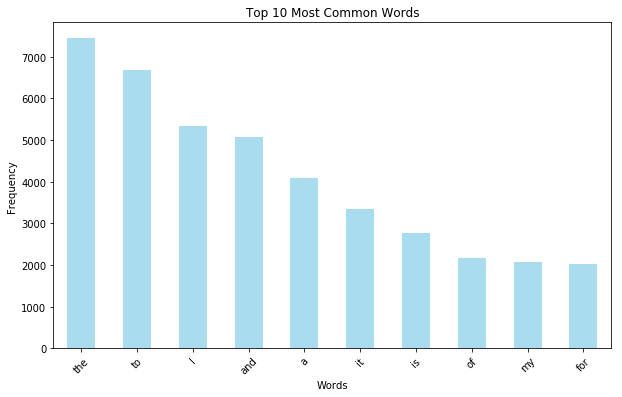

In [39]:
# Assuming `data['text_clean_v6']` contains the cleaned text data

# Count the most common words
common_words = pd.Series(' '.join(data['text_clean_v6']).split()).value_counts().head(10)

# Plotting the top 10 most common words
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
common_words.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [40]:
# Counts of Negative/Positive Words

negative_words = ['bad', 'horrible', 'sad','wrong','no','worst','worse',
                  'not', 'terrible', 'okay', 'sorrow', 'kill', 'negative', 'empty',
                 'hollow', 'poor', 'upset', 'why', 'unfair', 'eliminate','not',
                  'never', 'hate', 'dislike'] 

positive_words = ['good', 'great', 'awesome', 'happy', 'joy', 'enjoy', 'use', 'useful',
                  'wonder', 'wonderful', 'love', 'like', 'amazing',
                  'thanks', 'thank','hey', 'haha','nice', 'cool', 'lol',
                 'right', 'yeah', 'fun', 'well', 'enjoyable', 'crazy', 'super', 'kickass']

data['neg_word_cnt'] = data['text_clean_v6'].apply(lambda x: len([x for x in x.split() if x.lower() in negative_words]))
data['pos_word_cnt'] = data['text_clean_v6'].apply(lambda x: len([x for x in x.split() if x.lower() in positive_words]))

# derived ratios
data['neg_word_cnt_ratio1'] = data['neg_word_cnt']/data['word_cnt']
data['neg_word_cnt_ratio2'] = data['neg_word_cnt']/data['sentence_cnt']
data['pos_word_cnt_ratio1'] = data['pos_word_cnt']/data['word_cnt']
data['pos_word_cnt_ratio2'] = data['pos_word_cnt']/data['sentence_cnt']

new_features_2 = ['neg_word_cnt', 'pos_word_cnt','neg_word_cnt_ratio1','neg_word_cnt_ratio2','pos_word_cnt_ratio1','pos_word_cnt_ratio2']

data[['text_clean_v6'] + new_features_2].head()

,text_clean_v6,neg_word_cnt,pos_word_cnt,neg_word_cnt_ratio1,neg_word_cnt_ratio2,pos_word_cnt_ratio1,pos_word_cnt_ratio2
1,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",0,1,0.000000,0.000,0.043478,0.500
2,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",3,1,0.030928,0.375,0.010309,0.125
6,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",0,1,0.000000,0.000,0.020833,0.500
7,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",1,2,0.009615,0.250,0.019231,0.500
8,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",0,1,0.000000,0.000,0.058824,0.500


In [41]:
# Count Vectors (Single Word)

from sklearn.feature_extraction.text import CountVectorizer
num_features = 50
vectorizer = CountVectorizer(ngram_range=(1,1), 
                            max_features = num_features,
                            max_df=1.0, min_df=0.0)
count_vectors = vectorizer.fit_transform(list(data['text_clean_v6']))


# reshape to pandas
from scipy import sparse
count_vectors_pd = pd.DataFrame(count_vectors.todense())
count_vectors_pd.columns = vectorizer.get_feature_names()
count_vector_features = vectorizer.get_feature_names()
data = pd.concat([data.reset_index(drop=True),count_vectors_pd.reset_index(drop=True)], axis=1)
  

In [42]:
# Count Vectors (2-Gram)

from sklearn.feature_extraction.text import CountVectorizer
num_features = 25
vectorizer = CountVectorizer(ngram_range=(2,2), 
                            max_features = num_features,
                            max_df=1.0, min_df=0.0)
count_vectors = vectorizer.fit_transform(list(data['text_clean_v6']))

# reshape to pandas
from scipy import sparse
count_vectors_pd = pd.DataFrame(count_vectors.todense())
count_vectors_pd.columns = vectorizer.get_feature_names()
count_vector_2gram_features = vectorizer.get_feature_names()
data = pd.concat([data.reset_index(drop=True),count_vectors_pd.reset_index(drop=True)], axis=1)
  

In [43]:
# TFIDF Vectors

from sklearn.feature_extraction.text import TfidfVectorizer
num_features = 50
vectorizer = TfidfVectorizer(ngram_range=(1,1), 
                            max_features = num_features,
                            max_df=1.0, min_df=0.0)
count_vectors = vectorizer.fit_transform(list(data['text_clean_v6']))


# reshape to pandas
from scipy import sparse
count_vectors_pd = pd.DataFrame(count_vectors.todense())
count_vectors_pd.columns = vectorizer.get_feature_names()
tfidf_features = vectorizer.get_feature_names()
data = pd.concat([data.reset_index(drop=True),count_vectors_pd.reset_index(drop=True)], axis=1)
  

In [44]:
#!pip install afinn

In [45]:
'''
from afinn import Afinn

def Afinn_apply(var):
    afinn = Afinn(emoticons=True)
    return afinn.score(var)

data['Afinn'] = data['text_clean_v6'].apply(Afinn_apply)
data[['text_clean_v6', 'Afinn']].head()
'''

"\nfrom afinn import Afinn\n\ndef Afinn_apply(var):\n    afinn = Afinn(emoticons=True)\n    return afinn.score(var)\n\ndata['Afinn'] = data['text_clean_v6'].apply(Afinn_apply)\ndata[['text_clean_v6', 'Afinn']].head()\n"

In [46]:
 from textblob import TextBlob

def TextBlobPolarity(var):
  testimonial = TextBlob(var)
  return testimonial.sentiment.polarity

def TextBlobSubjectivity(var):
  testimonial = TextBlob(var)
  return testimonial.sentiment.subjectivity

data['TextBlobSubjectivity'] = data['text_clean_v6'].apply(TextBlobSubjectivity)
data['TextBlobPolarity'] = data['text_clean_v6'].apply(TextBlobPolarity)
data['TextBlobSubPol_Interaction'] = data['TextBlobSubjectivity']*data['TextBlobPolarity']
data[['text_clean_v6', 'TextBlobPolarity', 'TextBlobSubjectivity']].head()

,text_clean_v6,TextBlobPolarity,TextBlobSubjectivity
0,"I love my Google speaker, especially when it remind me of my daily task the weather and calendar. It keeps me on track.",0.166667,0.533333
1,"The speaker does NOT come speaking English. I read many other reviews saying theirs had came in Spanish which would have been fine, but that was also not the case for me, mine was French. Luckily I have other speakers so set up wasn't to difficult. I love these speakers they make some things easier. Mine does make a weird sound as if you were trying to change the radio station on a satellite radio. Not sure if anyone else's is doing that or not. Makes me nervous. If it continues I will be sending it back.",0.046429,0.462302
2,"It works fine, but if you want to put this cord behind some furniture (like me), the plug will be sticking about 4 inches off the wall. I had to use a separate extension cable to be able to push the piece of furniture back against the wall.",0.129167,0.456250
3,"Always wanted my house to be more techy and honestly this was a good first step for me. I have so many lights around the house and its so easy to control through voice rather than switching it off one by one every morning/night. My favorite command is “okay google, good morning”. It gives me a run down of my calendar, weather, important news, and plays my spotify to help me get ready!Listens to my voice even if I’m talking on a moderately low volume.The only thing i hate about it is that it took up the entire 2 sockets because its rather large.",0.271379,0.644320
4,"Despite getting the Japanese language version for some reason, once paired it switched to English. Great item.",0.266667,0.250000


In [47]:
# Prepare the Data

data_temp = data[['response','char_cnt', 'word_cnt', 'sentence_cnt', 'avg_word_size','avg_char_per_sent',
                  'avg_word_per_sent','TextBlobSubPol_Interaction',
                 'TextBlobPolarity', 'TextBlobSubjectivity', 
                  'noun_cnt', 'proper_noun_cnt', 
                'pronoun_cnt','wh_pronoun_cnt','pronoun_tot_cnt',
                'adj_cnt', 'adverb_cnt','foreign_cnt','det_cnt', 'modal_cnt',
                'verb_cnt', 'verb_past_cnt', 'verb_present_cnt','verb_tot_cnt'
                ,'cc_cnt', 'in_cnt', 'ccin_cnt'] 
                 + count_vector_features
                 + tfidf_features
                 + count_vector_2gram_features
                 + new_features_2]
data_temp = data_temp.dropna()
data_temp.drop_duplicates(keep = 'first',inplace = True)
data_temp.head()

,response,char_cnt,word_cnt,sentence_cnt,avg_word_size,avg_char_per_sent,avg_word_per_sent,TextBlobSubPol_Interaction,TextBlobPolarity,TextBlobSubjectivity,noun_cnt,proper_noun_cnt,pronoun_cnt,wh_pronoun_cnt,pronoun_tot_cnt,adj_cnt,adverb_cnt,foreign_cnt,det_cnt,modal_cnt,verb_cnt,verb_past_cnt,verb_present_cnt,verb_tot_cnt,cc_cnt,in_cnt,ccin_cnt,alexa,alexa,all,all,amazon,amazon,an,an,and,and,app,app,are,...,when,will,will,with,with,work,work,you,you,able to,and it,and the,easy to,echo dot,for the,have to,if you,in the,it is,it to,it was,of the,on the,set up,the app,the hub,this is,to be,to get,to my,to the,to use,with the,you can,neg_word_cnt,pos_word_cnt,neg_word_cnt_ratio1,neg_word_cnt_ratio2,pos_word_cnt_ratio1,pos_word_cnt_ratio2
0,1,119,23,2,5.173913,59.500,11.500,0.088889,0.166667,0.533333,6,1,7,0,7,1,1,0,0,0,1,2,0,3,1,2,3,0,0.0,0,0.0,0,0.0,0,0.0,1,0.170164,0,0.0,0,...,0.313394,0,0.000000,0,0.0,0,0.0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000,0.043478,0.500
1,1,511,97,8,5.268041,63.875,12.125,0.021464,0.046429,0.462302,17,2,11,0,11,11,9,0,0,2,5,13,8,26,2,7,9,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,...,0.000000,1,0.155140,0,0.0,0,0.0,1,0.127907,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0.030928,0.375,0.010309,0.125
2,1,241,48,2,5.020833,120.500,24.000,0.058932,0.129167,0.456250,10,0,4,0,4,3,1,0,0,1,5,3,1,9,1,7,8,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,...,0.000000,1,0.241686,0,0.0,0,0.0,1,0.199261,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0.000000,0.000,0.020833,0.500
3,1,550,104,4,5.288462,137.500,26.000,0.174855,0.271379,0.644320,19,0,16,0,16,17,9,0,0,0,4,10,3,17,3,12,15,0,0.0,0,0.0,0,0.0,0,0.0,3,0.224269,0,0.0,0,...,0.000000,0,0.000000,0,0.0,0,0.0,0,0.000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,2,0.009615,0.250,0.019231,0.500
4,1,110,17,2,6.470588,55.000,8.500,0.066667,0.266667,0.250000,6,2,1,0,1,1,1,0,0,0,0,1,2,3,0,2,2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,...,0.000000,0,0.000000,0,0.0,0,0.0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000,0.058824,0.500


In [48]:
# Train Test Split

X = data_temp.drop('response', axis = 1)
y = data_temp['response'].astype('int')

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=20)

In [49]:
#Using the inverse of the class frequency to balance .. Let's what the output comes -Azizur

#Accuracy decreased not good !!!

#from sklearn.utils.class_weight import compute_class_weight
#class_weights_val = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


In [50]:
#class_weights

In [51]:
from catboost import CatBoostClassifier, Pool

train_pool = Pool(X_train, y_train, cat_features = np.where(X.dtypes == 'object')[0])
test_pool = Pool(X_test, y_test, cat_features = np.where(X.dtypes == 'object')[0])
model = CatBoostClassifier(random_state = 1, eval_metric='AUC', use_best_model = True, verbose = 200, class_weights = [1,2] )
model.fit(train_pool, eval_set = test_pool)

Learning rate set to 0.083605
0:	test: 0.8390534	best: 0.8390534 (0)	total: 198ms	remaining: 3m 18s
200:	test: 0.9008858	best: 0.9040080 (133)	total: 15.2s	remaining: 1m
400:	test: 0.8987634	best: 0.9040080 (133)	total: 30.9s	remaining: 46.2s
600:	test: 0.8977636	best: 0.9040080 (133)	total: 46s	remaining: 30.5s
800:	test: 0.8972725	best: 0.9040080 (133)	total: 1m 1s	remaining: 15.3s
999:	test: 0.8967287	best: 0.9040080 (133)	total: 1m 16s	remaining: 0us

bestTest = 0.9040079516
bestIteration = 133

Shrink model to first 134 iterations.


In [52]:
#CAT FEATURE IMPORTANCE

feature_importance = model.get_feature_importance(train_pool)
feature_names = X_train.columns
feature_imp = pd.DataFrame([feature_names, feature_importance])
final = feature_imp.transpose()
final.sort_values(by = 1, ascending = False, inplace = True)
pd.set_option('display.max_colwidth', -1)
final.head(10)

,0,1
6,TextBlobSubPol_Interaction,16.3961
7,TextBlobPolarity,12.3324
255,pos_word_cnt_ratio1,4.51383
251,neg_word_cnt,3.32947
15,adverb_cnt,2.66585
229,easy to,1.97733
254,neg_word_cnt_ratio2,1.65092
79,me,1.50171
84,not,1.14615
103,the,1.09147


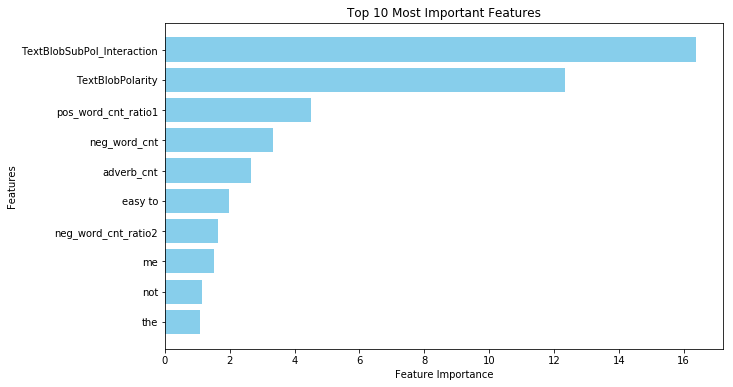

In [53]:
# Assuming `feature_names` and `feature_importance` are already extracted
import pandas as pd
import matplotlib.pyplot as plt

# Create the feature importance DataFrame
feature_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the features by importance
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Plotting the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(feature_imp['Feature'][:10], feature_imp['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


In [54]:
# RESULTS
probs = model.predict_proba(test_pool)
pred = np.where(probs[:,1] > 0.90, 1, 0)

print('Predicted Class and Probabilities: \n')
print(pred[:5]) # predicted class
print(probs[:5]) # probability scores

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
print('\nAccuracy: ', str(accuracy_score(y_test, pred)))
print('Precision: ', str(precision_score(y_test, pred)))
print('Recall: ', str(recall_score(y_test, pred)))
print('F1: ', str(f1_score(y_test, pred)))
print('Area under ROC Curve: ', str(roc_auc_score(y_test, probs[:,1])))
print('GINI: ', str(-1 + 2*roc_auc_score(y_test, probs[:,1])))

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

print('\nTrue Negatives: ', str(tn))
print('True Positives: ', str(tp))
print('False Negatives: ', str(fn))
print('False Positives: ', str(fp))

print('\nTotal Reviews: ', str(tn+fp+fn+tp))
print('Reviews Predicted as Negative: ', str(fn+tn))
print('Total Negative Reviews in Actuality: ', str(fp+tn))
print('Negative Reviews that were Correctly Predicted: ', str(tn))

#Aziz Here THe second model works batter due to using class weights[1,2] which 1 to the majority class and 2 to the minority class ... This makes the modle pay
#much more attention to minortiy class penalizing any error.  #The previous model we didn't account class imbalance 

#I


Predicted Class and Probabilities: 

[0 0 0 1 0]
[[0.90274743 0.09725257]
 [0.42277971 0.57722029]
 [0.16225328 0.83774672]
 [0.06737011 0.93262989]
 [0.77624806 0.22375194]]

Accuracy:  0.6908212560386473
Precision:  0.9585492227979274
Recall:  0.42725173210161665
F1:  0.5910543130990416
Area under ROC Curve:  0.904007951588856
GINI:  0.8080159031777121

True Negatives:  387
True Positives:  185
False Negatives:  248
False Positives:  8

Total Reviews:  828
Reviews Predicted as Negative:  635
Total Negative Reviews in Actuality:  395
Negative Reviews that were Correctly Predicted:  387


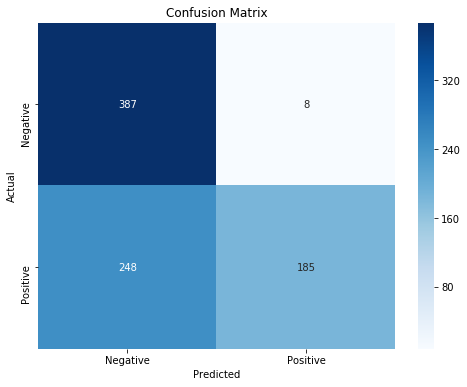

In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

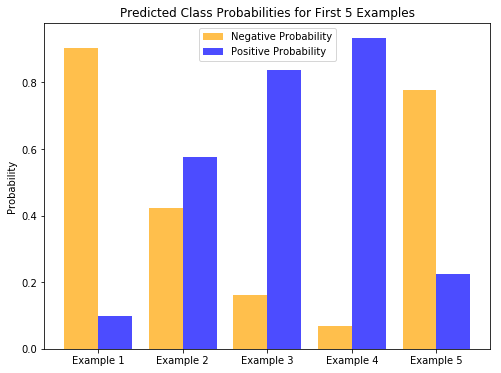

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `probs` contains the probability scores and `example_ids` are for the first 5 examples
example_ids = range(1, 6)  # Example IDs for visualization
positive_probs = probs[:5, 1]  # Positive class probabilities
negative_probs = probs[:5, 0]  # Negative class probabilities

# Plotting probabilities with clear representation
plt.figure(figsize=(8, 6))
width = 0.4  # Width of the bars
positions = np.arange(len(example_ids))

# Plot bars for negative and positive probabilities
plt.bar(positions - width / 2, negative_probs, width=width, label='Negative Probability', color='orange', alpha=0.7)
plt.bar(positions + width / 2, positive_probs, width=width, label='Positive Probability', color='blue', alpha=0.7)

# Formatting the graph
plt.xticks(positions, [f'Example {i}' for i in example_ids])
plt.ylabel('Probability')
plt.title('Predicted Class Probabilities for First 5 Examples')
plt.legend()
plt.show()


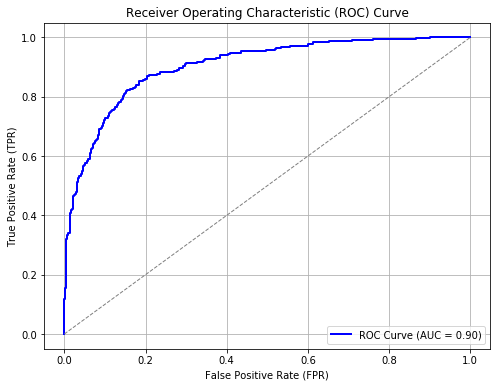

In [57]:
# Import necessary library
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Area Under the Curve

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


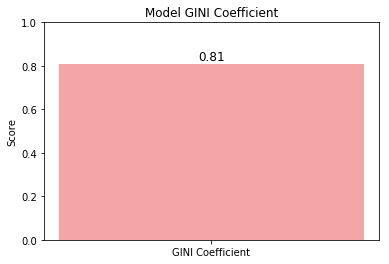

In [58]:
# Calculate the GINI coefficient
gini = -1 + 2 * roc_auc

# Plotting the GINI coefficient
plt.figure(figsize=(6, 4))
plt.bar(['GINI Coefficient'], [gini], color='lightcoral', alpha=0.7)
plt.ylim(0, 1)  # GINI values range from 0 to 1
plt.title('Model GINI Coefficient')
plt.ylabel('Score')

# Annotate the bar value
plt.text(0, gini + 0.02, f'{gini:.2f}', ha='center', fontsize=12)

plt.show()
